In [1]:
import ultralytics
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image



In [2]:

model = YOLO('/home/antonino/Università/porto/train/train/weights/best.pt')


In [3]:
img_start = cv2.imread('speedboat.jpg')
img = cv2.resize(img_start, (640, 640))
rgb_img = img.copy()
img = img.astype(np.float32) / 255.0

In [4]:
target_layers =[model.model.model[-4]]


0: 640x640 1 Speed Boat, 56.4ms
Speed: 10.1ms preprocess, 56.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


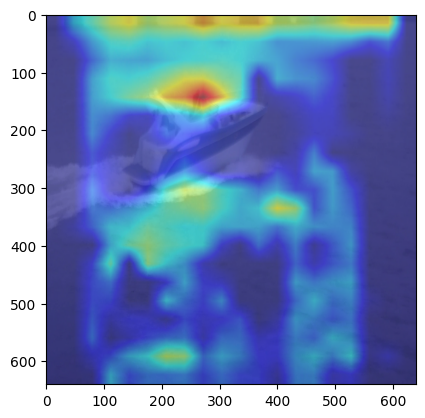

In [7]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

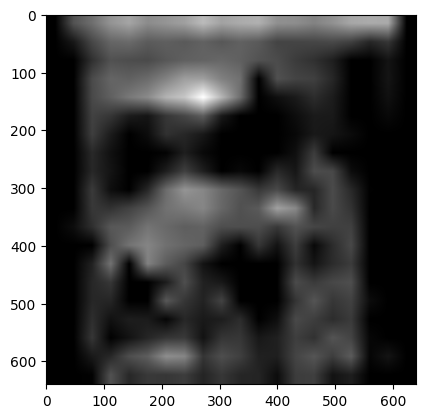

In [8]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

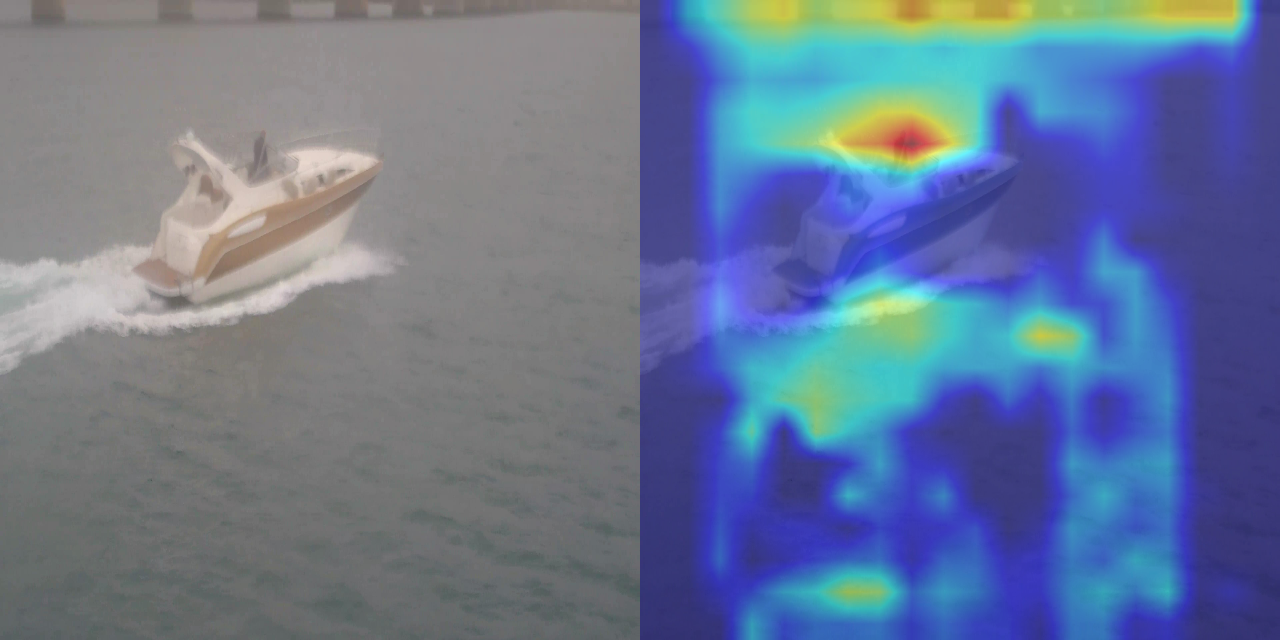

In [9]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

In [120]:
def place_image_part_over(source_image, overlay_image, xyxy_coordinates):


    bbox = np.reshape(xyxy_coordinates, (4,))
    x1, y1, x2, y2 = bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    # Calculate the position to place the overlay image
    # Extract the part of the overlay image specified by the coordinates
    overlay_part = overlay_image[y1:y2, x1:x2]
    overlay_part = overlay_part/255
    # Overlay the extracted part of the second image onto the first image
    source_image[y1:y2, x1:x2] = overlay_part

    # Save the resulting image

    return source_image

In [121]:

results = model(rgb_img)
boh = results[0].boxes

box = boh.xyxy[0].cpu().numpy()



0: 640x640 1 Speed Boat, 56.3ms
Speed: 9.2ms preprocess, 56.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


In [104]:
bbox = np.reshape(box, (4,))
x1, y1, x2, y2 = bbox
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
# Calculate the position to place the overlay image
# Extract the part of the overlay image specified by the coordinates


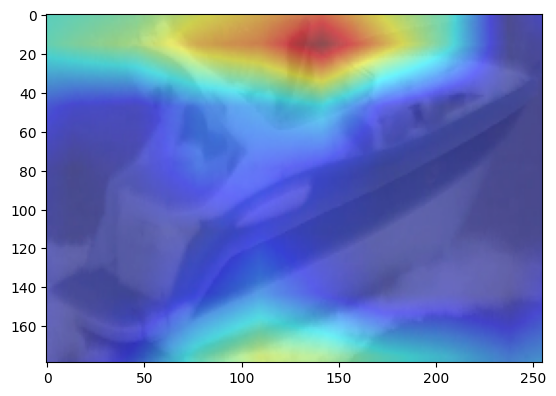

In [112]:
overlay_part = cam_image[y1:y2, x1:x2]
plt.imshow(overlay_part)

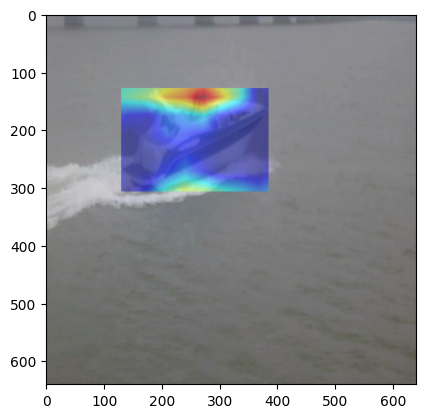

In [122]:
renormalized_cam_image = place_image_part_over(img, cam_image, box)

plt.imshow(renormalized_cam_image)